In [10]:
!curl -o img.png https://bea.stollnitz.com/images/rag/rag-2.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 89316  100 89316    0     0   327k      0 --:--:-- --:--:-- --:--:--  326k


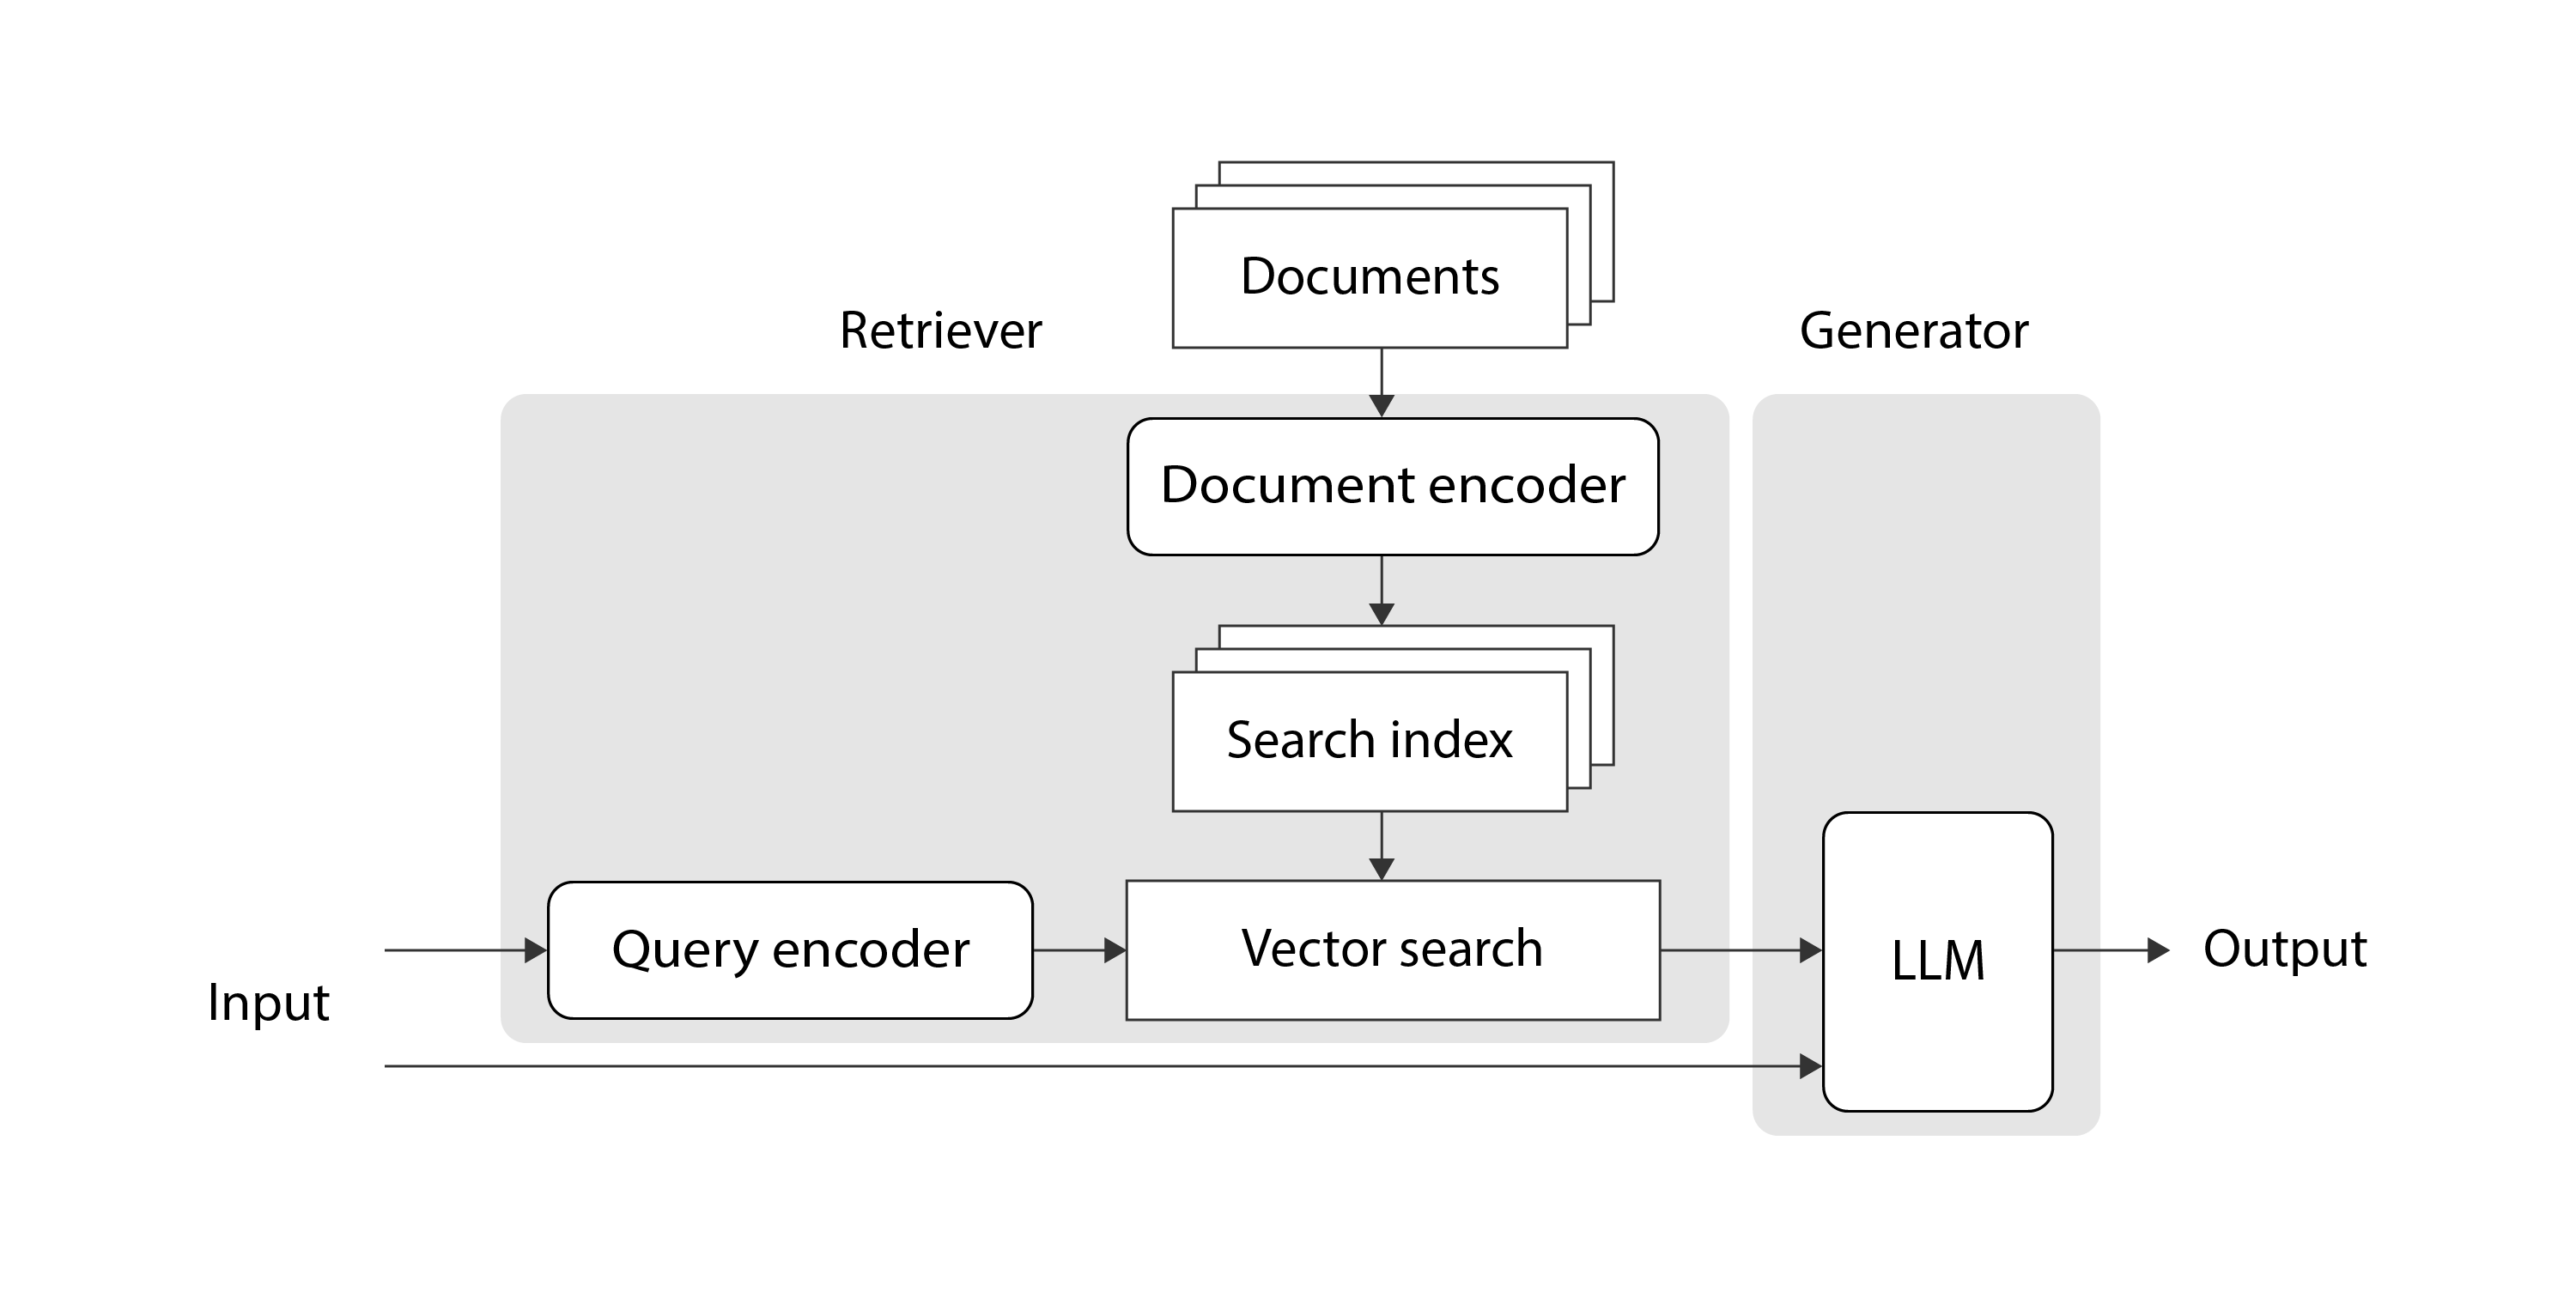

In [11]:
from PIL import Image
Rag_Pipeline=Image.open("img.png")
Rag_Pipeline

In [12]:
corpus_of_documents = [
    "Read a mystery novel and get lost in its twists and turns.",
    "Spend an evening stargazing and identifying constellations.",
    "Visit a botanical garden and admire the colorful flowers.",
    "Volunteer at a local shelter and make someone's day brighter.",
    "Take a photography walk and capture interesting street moments.",
    "Join a pottery or painting class and express your creativity.",
    "Plan a road trip to a nearby town and explore its hidden gems.",
    "Organize a movie marathon night with your favorite films.",
    "Learn a new dance form and groove to its beats.",
    "Spend a quiet afternoon journaling in your favorite café."
]

In [13]:
!curl -o img2.png https://memgraph.com/images/blog/cosine-similarity-python-scikit-learn/cosine-similarity-formula-equivalent.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11217  100 11217    0     0  75833      0 --:--:-- --:--:-- --:--:-- 76306


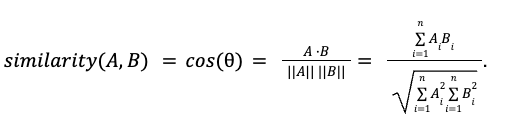

In [15]:
cosine_similarity=Image.open("img2.png")
cosine_similarity

In [17]:
from collections import Counter
import math

In [20]:
def cosine_sim(query,doc):
  query_token=query.lower().split(" ")
  query_counter=Counter(query_token)

  doc_token=doc.lower().split(" ")
  doc_counter=Counter(doc_token)

  dot_product=sum(query_counter[token]*doc_counter[token] for token in query_counter.keys() and doc_counter.keys())

  query_magnitude=math.sqrt(sum(query_counter[token]**2 for token in query_counter.keys()))
  doc_magnitude=math.sqrt(sum(doc_counter[token]**2 for token in doc_counter.keys()))

  similarity=dot_product/(query_magnitude*doc_magnitude)
  return similarity

In [21]:
user_query="is yoga good for health"
doc="yoga is very good for living healthy lifesytle."
sim=cosine_sim(user_query,doc)
print(sim)

0.6324555320336759


In [25]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_sim(query, doc)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]

In [26]:
user_input="i like noval"

In [30]:
relevent_res=return_response(user_input,corpus_of_documents)
print(relevent_res)

Read a mystery novel and get lost in its twists and turns.


In [32]:
import requests
import json

In [ ]:
full_response = []
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevent_res}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

url = 'http://localhost:11434/api/generate'

data={
    "model":"gemma3:4b",
    "prompt": prompt.format(user_input=user_input, relevent_res=relevent_res)
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)

try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            full_response.append(decoded_line['response'])
finally:
    response.close()


print(''.join(full_response))